# Ноутбук по созданию базы данных из источника 

Задание 
Используя инструмент DbSchema для визуализации схемы БД, разработайте схему БД для хранения данных представленных в датасете по пациентам.

В БД должны быть основные данные из датасета при этом необязательно соблюдать соответствие «один файл .csv — одна таблица». Данные распределяются между таблицами в соответствии с 1НФ-3НФ.

Подробнее ознакомиться с описанием датасета можно по ссылке:
https://www.kaggle.com/datasets/shivan118/healthcare-analytics

In [1]:
import numpy as np
import pandas as pd

## Шаг 1. Прочитаем все файлы

In [5]:
health_camp_details = pd.read_csv('Health_Camp_Detail.csv')
health_camp_details.head(10)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1
5,6581,07-Dec-03,13-Jun-04,First,F,2
6,6564,17-Dec-03,11-Jun-04,First,C,2
7,6557,04-Jan-04,09-Jan-04,First,C,2
8,6538,09-Jan-04,04-Feb-05,First,F,2
9,6546,09-Jan-04,17-Jan-04,First,E,2


In [24]:
health_camp_details['Category1'].value_counts()

First     44
Second    11
Third     10
Name: Category1, dtype: int64

In [8]:
pat_profile = pd.read_csv('Patient_profile.csv')
pat_profile

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,None,None,None,28-Jan-07,NaN,NaN
37629,509515,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN
37630,510713,0,0,0,0,None,None,None,01-Feb-07,H,NaN
37631,493667,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN


In [9]:
att_1 = pd.read_csv('First_Health_Camp_Attended.csv')
att_1

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
...,...,...,...,...,...
6213,502728,6575,10,0.509804,NaN
6214,511088,6575,20,0.078431,NaN
6215,507608,6575,40,0.627451,NaN
6216,488046,6575,50,0.686275,NaN


In [10]:
att_2 = pd.read_csv('Second_Health_Camp_Attended.csv')
att_2

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712
...,...,...,...
7814,490853,6529,0.103136
7815,499836,6529,0.507841
7816,511286,6529,0.627865
7817,522935,6529,0.252714


In [11]:
att_3 = pd.read_csv('Third_Health_Camp_Attended.csv')
att_3

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2
...,...,...,...,...
6510,503791,6527,3,3
6511,517319,6528,1,3
6512,517319,6578,4,3
6513,517319,6527,4,4


In [13]:
train = pd.read_csv('Train.csv')
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


## Шаг 2. 
Определим таблицы и поля для создания БД по Health Camp
<ul>
   <li>- таблица 1 Camp_details. Поля:</li>
           <ul>
             <li>Health_Camp_ID - первичный ключ, int, обязательно</li>
             <li>Camp_Start_Date - дата, обязательно</li>
             <li>Camp_End_Date - дата, обязательно</li>
             <li>Category1  - текст, обязательно</li>
             <li>Category2 - текст, опционально </li>
             <li>Category3 - текст, опционально</li>
               </ul>           
     
   <li>- таблица 2 Patients. Поля:</li>
           <ul>
             <li>'Patient_ID' первичный ключ, int, обязательно</li>
             <li>'Online_Follower' - булево, опционально</li>
             <li>'LinkedIn_Shared'  - булево, опционально</li>
             <li>'Twitter_Shared'  - булево, опционально</li>
             <li>'Facebook_Shared' - булево, опционально</li>
             <li>'Income' - float, опционально</li>
             <li>'Education_Score' - float, опционально</li>
             <li>'Age' - int, обязательно</li>
             <li>'First_Interaction' - дата, обязательно</li>
             <li>'City_Type' - текст, опционально</li>
             <li>'Employer_Category' - текст, опционально</li>
            </ul>
    <li>- таблица 3 Registrations. Поля: </li>
        <ul>
         <li>'ID'  int, первичный ключ, обязательно</li>
         <li>'Patient_ID' - int, обязательно</li>
         <li>'Health_Camp_ID' - int, обязательно </li>
         <li>'Registration_Date' дата, обязательно</li>
         <li>'Var1' - int, опционально</li>
         <li>'Var2' - int, опционально</li>
         <li>'Var3' - int, опционально</li>
         <li>'Var4'-  int, опционально </li>
         <li>'Var5' - int, опционально</li>
          </ul>
    
   <li>- таблица 4 Attendance. Поля: </li>
            <ul>
         <li>'ID'  int, первичный ключ, обязательно</li>
         <li>'Patient_ID' - int, обязательно</li>
         <li>'Health_Camp_ID' - int, обязательно </li>
         <li> 'Health_Score' - float, обязательно </li>
          <li> 'Number_of_stall_visited' - int, необязательно </li> 
          <li> 'Last_Stall_Visited_Number' - int, необязательно </li> 
          <li> 'Donation' - float, необязательно </li>  
                
    Связи между таблицами:
                Patient_ID - таблица Patient к Attendance + Registrations
                Health_Camp_ID - таблица Camp_details к Attendance + Registrations

## Шаг 3 Подготовим базу данных и прогрузим таблицы

In [2]:
import sqlite3
import requests
from datetime import datetime, timedelta

In [3]:
# Создадим базу данных
CON = sqlite3.connect('test.db')

In [4]:
# Функция для создания таблиц и добавления данных
def insert_to_db(data, table_name,conn = CON):
    data.to_sql(table_name, conn, if_exists = 'replace', index = False)

In [41]:
# Подготовим данные для загрузки и поменяем форматы на требуемые
health_camp_details['Camp_Start_Date'] = pd.to_datetime(health_camp_details['Camp_Start_Date'])
health_camp_details['Camp_End_Date'] = pd.to_datetime(health_camp_details['Camp_End_Date'])
health_camp_details['Category3'] = health_camp_details['Category3'].astype('object')
health_camp_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Health_Camp_ID   65 non-null     int64         
 1   Camp_Start_Date  65 non-null     datetime64[ns]
 2   Camp_End_Date    65 non-null     datetime64[ns]
 3   Category1        65 non-null     object        
 4   Category2        65 non-null     object        
 5   Category3        65 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.2+ KB


In [42]:
# Загрузим данные по Camp
insert_to_db(health_camp_details, 'Camp_details')

In [51]:
pat_profile['First_Interaction'] = pd.to_datetime(pat_profile['First_Interaction'])
pat_profile['Income'] = pat_profile['Income'].replace('None', 0).astype('float')
pat_profile['Education_Score'] = pat_profile['Education_Score'].replace('None', 0).astype('float')
pat_profile['Age'] = pat_profile['Age'].replace('None', 0).astype('int')
pat_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient_ID         37633 non-null  int64         
 1   Online_Follower    37633 non-null  int64         
 2   LinkedIn_Shared    37633 non-null  int64         
 3   Twitter_Shared     37633 non-null  int64         
 4   Facebook_Shared    37633 non-null  int64         
 5   Income             37633 non-null  float64       
 6   Education_Score    37633 non-null  float64       
 7   Age                37633 non-null  int32         
 8   First_Interaction  37633 non-null  datetime64[ns]
 9   City_Type          37633 non-null  object        
 10  Employer_Category  37633 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(2)
memory usage: 3.0+ MB


In [52]:
insert_to_db(pat_profile, 'Patients')

In [58]:
reg = train.rename_axis('ID').reset_index()
reg['Registration_Date'] = pd.to_datetime(reg['Registration_Date'])
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75278 entries, 0 to 75277
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 75278 non-null  int64         
 1   Patient_ID         75278 non-null  int64         
 2   Health_Camp_ID     75278 non-null  int64         
 3   Registration_Date  74944 non-null  datetime64[ns]
 4   Var1               75278 non-null  int64         
 5   Var2               75278 non-null  int64         
 6   Var3               75278 non-null  int64         
 7   Var4               75278 non-null  int64         
 8   Var5               75278 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 5.2 MB


In [59]:
insert_to_db(reg, 'Registrations')

In [81]:
attendance = pd.concat([att_1, att_2, att_3], ignore_index = True)
attendance = attendance.rename_axis('ID').reset_index()
attendance = attendance.fillna(0)
attendance  = attendance.drop('Unnamed: 4', axis = 1)
attendance  = attendance.drop('Health_Score', axis = 1)
attendance['Number_of_stall_visited'] = attendance['Number_of_stall_visited'].astype(int)
attendance['Last_Stall_Visited_Number'] = attendance['Last_Stall_Visited_Number'].astype(int)
attendance['Donation'] = attendance['Donation'].astype(int)
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20552 entries, 0 to 20551
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         20552 non-null  int64  
 1   Patient_ID                 20552 non-null  int64  
 2   Health_Camp_ID             20552 non-null  int64  
 3   Donation                   20552 non-null  int32  
 4   Health Score               20552 non-null  float64
 5   Number_of_stall_visited    20552 non-null  int32  
 6   Last_Stall_Visited_Number  20552 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 883.2 KB


In [82]:
insert_to_db(attendance, 'Attendance')

Финальный вид базы

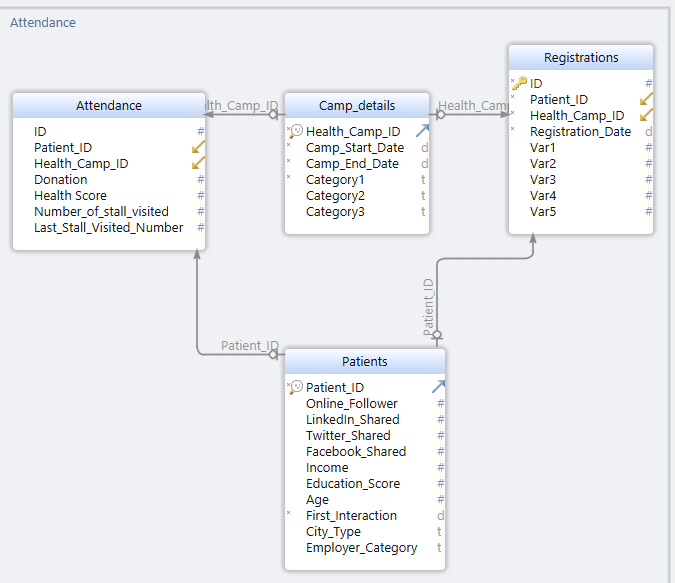

In [5]:
def create_table(query, con = CON):
    try:
        cursor = CON.cursor()
        cursor.execute(query)
        con.commit()
        print('Table created')
        cursor.close()
    except sqlite3.Error as error:
        print('Not connected', error)
        


In [6]:
def get_query(query, con = CON):
    try:
        cursor = CON.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        print(record)
        cursor.close()
    except sqlite3.Error as error:
        print(error)

In [12]:
query1 = "create table Students(id int, name text, country text, education text)"
query2 = "select * from Students"
create_table(query1)
get_query(query2)

Table created
[]


In [18]:
query3 = "insert into Students values (2, 'Anna', 'Russia', 'Magistr'),\
                                    (3, 'Victor', 'France', 'No education');"

create_table(query3)

Table created


In [7]:
query4 = "insert into Students values (4, 'Anna', 'Russia', 'Magistr'),\
                                    (5, 'Victor', 'France', 'No education');"

create_table(query4)

Table created


In [9]:
query2 = "select * from Students"
get_query(query2)

[(1, 'Anna', 'Russia', 'Magistr'), (2, 'Anna', 'Russia', 'Magistr'), (3, 'Victor', 'France', 'No education'), (4, 'Anna', 'Russia', 'Magistr'), (5, 'Victor', 'France', 'No education')]


In [11]:
alist = list(map(lambda x: x*x, [1, 5]))
alist

[1, 25]

In [30]:
def has_friday_13(month, year):
    from datetime import datetime
    if datetime(year, month, 13).weekday() == 4:
        return True
    else:
        return False

In [34]:
has_friday_13(1, 2023)

True

In [39]:
lst = [('Русский', 88), ('Физика', 90), ('Алгебра', 97), ('История', 82)]
sort_lst = sorted(lst, key = lambda score: score[1])
print(sort_lst)

[('История', 82), ('Русский', 88), ('Физика', 90), ('Алгебра', 97)]


In [11]:
AA = {'id':[111,111,222,333, None], 'name':['JJ','JJ','VV','HH','MM']}
AA = pd.DataFrame(AA)
insert_to_db(AA,'AA')

In [12]:
BB = pd.DataFrame({'id': [111,222,222,None,444,None], 'name': ['BB','NN','NN','CC','AA', 'HH']})
insert_to_db(BB,'BB')


In [21]:
group_st3 = pd.DataFrame([(1,5), (2,4), (3,3), (4,2), (5,2), (6,4), (7,3), (8,4)], columns = ['id', 'score'])
insert_to_db(group_st3, 'group_st3')

In [22]:
group_st = pd.DataFrame([(1,23,1), (2,32,3), (3,14,1), (4,30,2), (5,19,1), (6,18,2), (7,25,3), (8,27,2)], columns = ['id', 'age', 'num_group'])
insert_to_db(group_st, 'group_st')

In [7]:
users = pd.DataFrame([(1,2000), (2,2500), (3,200), (4,600),(6,100), (7,2), (11,20), (20,567), (67,789)], columns = ['id', 'amount_to_pay'])
insert_to_db(users, 'users')